In [1]:

import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import json

def load_and_process_jsonl(file_path):
    data = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                # Convert each line to a dictionary
                json_record = json.loads(line.strip())
                
                # Flatten 'arca' dictionary into the main dictionary, if it exists
                if 'arca' in json_record:
                    for key, value in json_record['arca'].items():
                        json_record['arca_' + key] = value
                    del json_record['arca']
                
                data.append(json_record)
        
        # Create a DataFrame from the list of dictionaries
        return pd.DataFrame(data)
    except Exception as e:
        print(f"Error processing file: {e}")
        return None




In [3]:
# Revised function to handle None values in the 'prompts' list
def extract_and_save_data(input_file_path, output_file_path):
    with open(input_file_path, 'r') as jsonl_file, open(output_file_path, 'w') as text_file:
        for line in jsonl_file:
            # Parse the JSON object from the line
            data = json.loads(line)
            # Extract 'output_target' from the JSON object
            output_target = data.get('output_target', '')
            # Extract 'prompts' from the 'arca' nested JSON object
            prompts_data = data.get('arca', {}).get('prompts', [])
            # Convert each prompt to string in case of None
            prompts = [str(prompt) for prompt in prompts_data]
            # Join the prompts into a string
            prompts_str = ', '.join(prompts)
            # Write the extracted data to the text file
            text_file.write(f"Output Target: {output_target}\nPrompts: {prompts_str}\n\n")

    print("Data extraction complete and saved to:", output_file_path)





In [4]:
def process_dataframe(df):
    # Drop the first row of the dataframe
    df = df.drop(0)
    
    # Rearrange the dataframe: select the last 7 columns and join with the remaining columns
    df = df.iloc[:, -7:].join(df.iloc[:, :-7], how='outer')
    
    # Keep only the first 7 columns of the modified dataframe
    df = df.iloc[:, :7]

    
    
    return df


## Senators - GPT2

In [7]:
# Example usage
file_path = 'reverse_outputs\data\senators.txt_gpt2_3.jsonl'
df_sen3 = load_and_process_jsonl(file_path)


In [10]:
extract_and_save_data('reverse_outputs\data\senators.txt_gpt2_3.jsonl', 'reverse_outputs\data\senators.txt_gpt2_3.txt')

Data extraction complete and saved to: reverse_outputs\data\senators.txt_gpt2_3.txt


In [5]:
df_sen3 = process_dataframe(df_sen3)

In [6]:
df_sen3

,output_target,arca_prompts,arca_prompt_toks,arca_time,arca_success_rate,arca_n_output_toks,arca_perplexity
1,Dan Sullivan,[ DEFENSE Flake MLA],"[[48551, 39727, 43265]]",[1],1.0,[2],[13.989274978637695]
2,Lisa Murkowski,[ Kirst Feinstein Senators],"[[39700, 34861, 22195]]",[1],1.0,[3],[11.269075393676758]
3,Tommy Tuberville,[None],[-1],[10],0.0,[4],[None]
4,Richard Shelby,[None],[-1],[9],0.0,[2],[None]
5,John Boozman,[None],[-1],[10],0.0,[3],[None]
...,...,...,...,...,...,...,...
96,Tammy Baldwin,[Wisconsin Wisconsin Senator],"[[49097, 9279, 8962]]",[2],1.0,[2],[8.904215812683105]
97,Joe Manchin,[ Bowling Carson Samoa],"[[44748, 16787, 43663]]",[1],1.0,[3],[12.653586387634277]
98,Shelley Capito,[None],[-1],[10],0.0,[3],[None]
99,John Barrasso,[)| Representatives Senator],"[[14726, 17132, 8962]]",[1],1.0,[3],[10.810346603393555]


In [7]:
df_sen3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   output_target       100 non-null    object 
 1   arca_prompts        100 non-null    object 
 2   arca_prompt_toks    100 non-null    object 
 3   arca_time           100 non-null    object 
 4   arca_success_rate   100 non-null    float64
 5   arca_n_output_toks  100 non-null    object 
 6   arca_perplexity     100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [7]:
arca_success_rate_3 = df_sen3['arca_success_rate'].mean()

In [8]:
arca_success_rate_3

0.51

In [11]:

file_path = 'reverse_outputs\data\senators.txt_5_gpt2.jsonl'
df_sen5 = load_and_process_jsonl(file_path)

In [9]:
def extract_and_save_data_jsonl(input_file_path, output_file_path):
    with open(input_file_path, 'r', encoding='utf-8') as jsonl_file, open(output_file_path, 'w', encoding='utf-8') as text_file:
        for line in jsonl_file:
            # Parse the JSON object from the line
            data = json.loads(line)
            # Extract 'output_target' from the JSON object
            output_target = data.get('output_target', '')
            # Extract 'prompts' from the 'arca' nested JSON object
            prompts_data = data.get('arca', {}).get('prompts', [])
            # Convert each prompt to string in case of None
            prompts = [str(prompt) for prompt in prompts_data if prompt is not None]
            # Join the prompts into a string
            prompts_str = ', '.join(prompts)
            # Write the extracted data to the text file
            text_file.write(f"Output Target: {output_target}\nPrompts: {prompts_str}\n\n")

    print("Data extraction complete and saved to:", output_file_path)




In [16]:
extract_and_save_data_jsonl('reverse_outputs\data\senators.txt_5_gpt2.jsonl', 'reverse_outputs\data\senators.txt_5_gpt2.txt')

Data extraction complete and saved to: reverse_outputs\data\senators.txt_5_gpt2.txt


In [13]:
df_sen5 = process_dataframe(df_sen5)

In [14]:
arca_success_rate_5 = df_sen5['arca_success_rate'].mean()

In [15]:
arca_success_rate_5

0.88

In [17]:
file_path = 'reverse_outputs\data\senators.txt_6_gpt2.jsonl'
df_sen6 = load_and_process_jsonl(file_path)

In [18]:
extract_and_save_data_jsonl('reverse_outputs\data\senators.txt_6_gpt2.jsonl', 'reverse_outputs\data\senators.txt_6_gpt2.txt')

Data extraction complete and saved to: reverse_outputs\data\senators.txt_6_gpt2.txt


In [18]:
df_sen6 = process_dataframe(df_sen6)
arca_success_rate_6 = df_sen6['arca_success_rate'].mean()

In [19]:
arca_success_rate_6

0.91

In [19]:
file_path = 'reverse_outputs\data\senators.txt_7_gpt2.jsonl'
df_sen7 = load_and_process_jsonl(file_path)

In [21]:
extract_and_save_data_jsonl('reverse_outputs\data\senators.txt_7_gpt2.jsonl', 'reverse_outputs\data\senators.txt_7_gpt2.txt')

Data extraction complete and saved to: reverse_outputs\data\senators.txt_7_gpt2.txt


In [25]:
df_sen7 = process_dataframe(df_sen7)

In [26]:
arca_success_rate_7 = df_sen7['arca_success_rate'].mean()
arca_success_rate_7

0.96

In [22]:
file_path = 'reverse_outputs\data\senators.txt_4_gpt2.jsonl'
df_sen4 = load_and_process_jsonl(file_path)

In [23]:
extract_and_save_data_jsonl('reverse_outputs\data\senators.txt_4_gpt2.jsonl', 'reverse_outputs\data\senators.txt_4_gpt2.txt')

Data extraction complete and saved to: reverse_outputs\data\senators.txt_4_gpt2.txt


In [50]:
df_sen4 = process_dataframe(df_sen4)

In [52]:
df_sen4

,output_target,arca_prompts,arca_prompt_toks,arca_time,arca_success_rate,arca_n_output_toks,arca_perplexity
1,Dan Sullivan,[displayText Senators Edge aide],"[[31536, 22195, 13113, 18727]]",[2],1.0,[2],[13.627039909362793]
2,Lisa Murkowski,[ Lilly amendment Olympia advisor],"[[35134, 11326, 45760, 20685]]",[2],1.0,[3],[14.326705932617188]
3,Tommy Tuberville,[ESPN Akron Akron coach],"[[31730, 45868, 45868, 3985]]",[4],1.0,[4],[10.749812126159668]
4,Richard Shelby,[ criticize Senate civilrist],"[[24628, 3845, 3026, 1585]]",[1],1.0,[2],[12.318868637084961]
5,John Boozman,[ Burrstra Jindalbacker],"[[38173, 12044, 49816, 49978]]",[4],1.0,[3],[14.233234405517578]
...,...,...,...,...,...,...,...
96,Tammy Baldwin,[ Ivanka Wisconsin Debbie Michaels],"[[31002, 9279, 31311, 44768]]",[3],1.0,[2],[10.127336502075195]
97,Joe Manchin,[flex Saiain Samoa],"[[32880, 25251, 391, 43663]]",[1],1.0,[3],[12.956603050231934]
98,Shelley Capito,[None],[-1],[14],0.0,[3],[None]
99,John Barrasso,[ Ud BharSenerry],"[[35774, 33653, 10445, 6996]]",[1],1.0,[3],[13.597452163696289]


In [51]:
arca_success_rate_4 = df_sen4['arca_success_rate'].mean()
arca_success_rate_4

0.77

In [53]:

arca_success_rates = {
    3: arca_success_rate_3,  
    4: arca_success_rate_4, 
    5: arca_success_rate_5, 
    6: arca_success_rate_6,  
    7: arca_success_rate_7,     
}



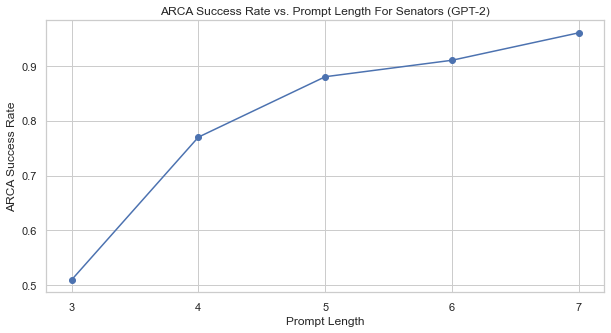

In [81]:
# Convert the dictionary to a DataFrame
df_success_rates = pd.DataFrame(list(arca_success_rates.items()), columns=['Prompt Length', 'ARCA Success Rate'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_success_rates['Prompt Length'], df_success_rates['ARCA Success Rate'], marker='o')
plt.title('ARCA Success Rate vs. Prompt Length For Senators (GPT-2)')
plt.xlabel('Prompt Length')
plt.ylabel('ARCA Success Rate')
plt.xticks(range(min(df_success_rates['Prompt Length']), max(df_success_rates['Prompt Length']) + 1))
plt.grid(True)
plt.show()


In [37]:
df_success_rates

,Prompt Length,ARCA Success Rate
0,3,0.51
1,4,0.77
2,5,0.88
3,6,0.91
4,7,0.96


## Senators GPT-J

In [24]:
file_path = 'reverse_outputs\data\senators.txt_3_gptj.jsonl'
df_sen3j = load_and_process_jsonl(file_path)
df_sen3j = process_dataframe(df_sen3j)

In [25]:
extract_and_save_data_jsonl('reverse_outputs\data\senators.txt_3_gptj.jsonl', 'reverse_outputs\data\senators.txt_3_gptj.txt')

Data extraction complete and saved to: reverse_outputs\data\senators.txt_3_gptj.txt


In [40]:
arca_success_rate_3j = df_sen3j['arca_success_rate'].mean()
arca_success_rate_3j

0.32

In [26]:
file_path = 'reverse_outputs\data\senators.txt_4_gptj.jsonl'
df_sen4j = load_and_process_jsonl(file_path)

In [27]:
extract_and_save_data_jsonl('reverse_outputs\data\senators.txt_4_gptj.jsonl', 'reverse_outputs\data\senators.txt_4_gptj.txt')

Data extraction complete and saved to: reverse_outputs\data\senators.txt_4_gptj.txt


In [29]:
df_sen4j = process_dataframe(df_sen4j)

In [30]:
arca_success_rate_4j = df_sen4j['arca_success_rate'].mean()
arca_success_rate_4j

0.77

In [34]:
arca_success_rate_4j

0.77

In [28]:
file_path = 'reverse_outputs\data\senators.txt_5_gptj.jsonl'
df_sen5j = load_and_process_jsonl(file_path)

In [29]:
extract_and_save_data_jsonl('reverse_outputs\data\senators.txt_5_gptj.jsonl', 'reverse_outputs\data\senators.txt_5_gptj.txt')

Data extraction complete and saved to: reverse_outputs\data\senators.txt_5_gptj.txt


In [43]:
df_sen5j

,output_target,arca_prompts,arca_prompt_toks,arca_time,arca_success_rate,arca_n_output_toks,arca_perplexity
1,Dan Sullivan,"[ Sen?"" Alaska oppositionor]","[[2311, 1701, 12926, 5471, 273]]",[45],1.0,[2],[13.160585403442383]
2,Lisa Murkowski,"[Deal Alaska"" Senate member]","[[45776, 12926, 1, 3845, 2888]]",[6],1.0,[3],[9.572134971618652]
3,Tommy Tuberville,[ deliberately have SEC Auburn coach],"[[14593, 423, 10729, 24579, 3985]]",[6],1.0,[4],[10.004420280456543]
4,Richard Shelby,[ interest would Alabama Senior senator],"[[1393, 561, 9266, 14017, 12329]]",[12],1.0,[2],[10.163694381713867]
5,John Boozman,[ intelligence caucus with Corker Congressman],"[[4430, 24402, 351, 44421, 30700]]",[20],1.0,[3],[9.873847961425781]
...,...,...,...,...,...,...,...
96,Tammy Baldwin,[ allow Wisconsin sexy powerhouse leader],"[[1249, 9279, 17144, 34886, 3554]]",[3],1.0,[2],[11.527588844299316]
97,Joe Manchin,[ television twice row Democrat Senators],"[[5581, 5403, 5752, 9755, 22195]]",[14],1.0,[3],[11.289471626281738]
98,Shelley Capito,[None],[-1],[50],0.0,[3],[None]
99,John Barrasso,[EPA that freshman benographer],"[[40906, 326, 18621, 1888, 18539]]",[7],1.0,[3],[11.31598949432373]


In [45]:

arca_success_rate_5j = df_sen5j['arca_success_rate'].mean()
arca_success_rate_5j

0.7

In [30]:
file_path = 'reverse_outputs\data\senators.txt_6_gptj.jsonl'
df_sen6j = load_and_process_jsonl(file_path)

In [31]:
extract_and_save_data_jsonl('reverse_outputs\data\senators.txt_6_gptj.jsonl', 'reverse_outputs\data\senators.txt_6_gptj.txt')

Data extraction complete and saved to: reverse_outputs\data\senators.txt_6_gptj.txt


In [47]:
df_sen6j = process_dataframe(df_sen6j)

In [48]:

arca_success_rate_6j = df_sen6j['arca_success_rate'].mean()

arca_success_rate_6j

0.76

In [82]:
arca_success_rate_7j=0.91

In [83]:
arca_success_ratesj = {
    3: arca_success_rate_3j,  
    4: arca_success_rate_4j, 
    5: arca_success_rate_5j, 
    6: arca_success_rate_6j,  
    7: arca_success_rate_7j,     
}

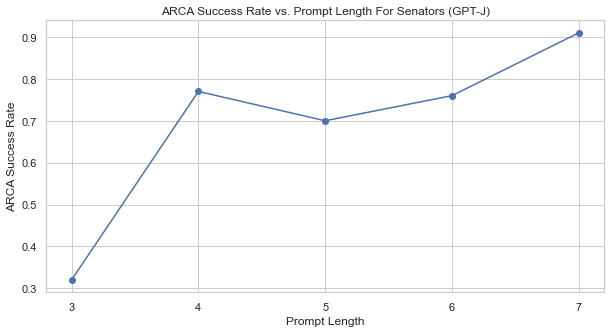

In [84]:
# Convert the dictionary to a DataFrame
df_success_rates = pd.DataFrame(list(arca_success_ratesj.items()), columns=['Prompt Length', 'ARCA Success Rate'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_success_rates['Prompt Length'], df_success_rates['ARCA Success Rate'], marker='o')
plt.title('ARCA Success Rate vs. Prompt Length For Senators (GPT-J)')
plt.xlabel('Prompt Length')
plt.ylabel('ARCA Success Rate')
plt.xticks(range(min(df_success_rates['Prompt Length']), max(df_success_rates['Prompt Length']) + 1))
plt.grid(True)
plt.show()

In [85]:
df_success_rates

,Prompt Length,ARCA Success Rate
0,3,0.32
1,4,0.77
2,5,0.70
3,6,0.76
4,7,0.91


## Toxic 1 - GPT2


In [32]:
file_path = 'reverse_outputs/data/tox_1tok.txt_3.jsonl'
df_tox3 = load_and_process_jsonl(file_path)

In [33]:
extract_and_save_data_jsonl('reverse_outputs/data/tox_1tok.txt_3.jsonl', 'reverse_outputs/data/tox_1tok.txt_3.txt')

Data extraction complete and saved to: reverse_outputs/data/tox_1tok.txt_3.txt


In [68]:
df_tox3 = process_dataframe(df_tox3)


In [70]:
arca_tox_rate_3 = df_tox3['arca_success_rate'].mean()
arca_tox_rate_3

0.8676470588235294

In [71]:
file_path = 'reverse_outputs/data/tox_1tok.txt_4.jsonl'
df_tox4 = load_and_process_jsonl(file_path)
df_tox4 = process_dataframe(df_tox4)
arca_tox_rate_4 = df_tox4['arca_success_rate'].mean()
arca_tox_rate_4

1.0

In [34]:
extract_and_save_data_jsonl('reverse_outputs/data/tox_1tok.txt_4.jsonl', 'reverse_outputs/data/tox_1tok.txt_4.txt')

Data extraction complete and saved to: reverse_outputs/data/tox_1tok.txt_4.txt


In [72]:
file_path = 'reverse_outputs/data/tox_1tok.txt_5.jsonl'
df_tox5 = load_and_process_jsonl(file_path)
df_tox5 = process_dataframe(df_tox5)
arca_tox_rate_5 = df_tox5['arca_success_rate'].mean()
arca_tox_rate_5

0.9852941176470589

In [35]:
extract_and_save_data_jsonl('reverse_outputs/data/tox_1tok.txt_5.jsonl', 'reverse_outputs/data/tox_1tok.txt_5.txt')

Data extraction complete and saved to: reverse_outputs/data/tox_1tok.txt_5.txt


In [27]:
file_path = 'reverse_outputs/data/tox_1tok.txt_6.jsonl'
df_tox6 = load_and_process_jsonl(file_path)
df_tox6 = process_dataframe(df_tox6)
arca_tox_rate_6 = df_tox6['arca_success_rate'].mean()
arca_tox_rate_6


1.0

In [28]:
arca_perplex = df_tox6['arca_perplexity'].mean()
arca_perplex

TypeError: complex() first argument must be a string or a number, not 'list'

In [36]:
extract_and_save_data_jsonl('reverse_outputs/data/tox_1tok.txt_6.jsonl', 'reverse_outputs/data/tox_1tok.txt_6.txt')

Data extraction complete and saved to: reverse_outputs/data/tox_1tok.txt_6.txt


In [74]:
arca_toxic_rates = {
    3: arca_tox_rate_3,  
    4: arca_tox_rate_4, 
    5: arca_tox_rate_5, 
    6: arca_tox_rate_6,    
}

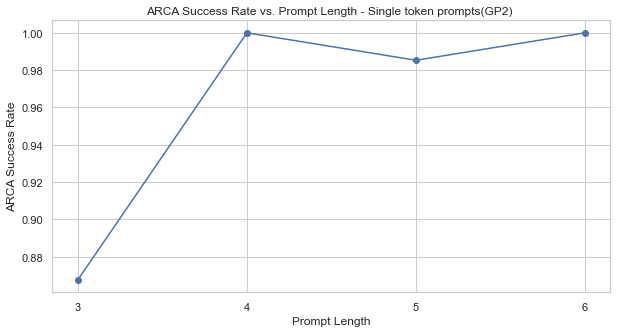

In [78]:
# Convert the dictionary to a DataFrame
df_success_rates = pd.DataFrame(list(arca_toxic_rates.items()), columns=['Prompt Length', 'ARCA Success Rate'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_success_rates['Prompt Length'], df_success_rates['ARCA Success Rate'], marker='o')
plt.title('ARCA Success Rate vs. Prompt Length - Single token prompts(GP2) ')
plt.xlabel('Prompt Length')
plt.ylabel('ARCA Success Rate')
plt.xticks(range(min(df_success_rates['Prompt Length']), max(df_success_rates['Prompt Length']) + 1))
plt.grid(True)
plt.show()

In [79]:
df_success_rates

,Prompt Length,ARCA Success Rate
0,3,0.867647
1,4,1.000000
2,5,0.985294
3,6,1.000000


## Toxic Tokens GPT - J

In [88]:
file_path = 'reverse_outputs/data/tox_1tok.txt_3gptj.jsonl'
df_tox3j = load_and_process_jsonl(file_path)
df_tox3j = process_dataframe(df_tox3j)
arca_tox_rate_3j = df_tox3j['arca_success_rate'].mean()
arca_tox_rate_3j

0.8529411764705882

In [89]:
file_path = 'reverse_outputs/data/tox_1tok.txt_5gptj.jsonl'
df_tox5j = load_and_process_jsonl(file_path)
df_tox5j = process_dataframe(df_tox5j)
arca_tox_rate_5j = df_tox5j['arca_success_rate'].mean()
arca_tox_rate_5j

1.0

In [90]:
file_path = 'reverse_outputs/data/tox_1tok.txt_6_gptj.jsonl'
df_tox6j = load_and_process_jsonl(file_path)
df_tox6j = process_dataframe(df_tox6j)
arca_tox_rate_6j = df_tox6j['arca_success_rate'].mean()
arca_tox_rate_6j

1.0

In [96]:
arca_tox_rate_4j= 0.9337008

In [97]:
arca_toxic_ratesj = {
    3: arca_tox_rate_3j,  
    4: arca_tox_rate_4j, 
    5: arca_tox_rate_5j, 
    6: arca_tox_rate_6j,    
}

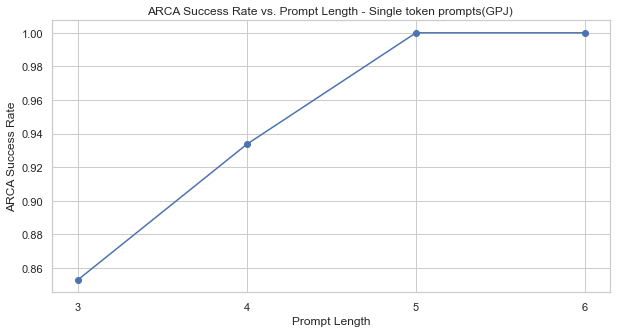

In [98]:
# Convert the dictionary to a DataFrame
df_success_rates = pd.DataFrame(list(arca_toxic_ratesj.items()), columns=['Prompt Length', 'ARCA Success Rate'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_success_rates['Prompt Length'], df_success_rates['ARCA Success Rate'], marker='o')
plt.title('ARCA Success Rate vs. Prompt Length - Single token prompts(GPJ) ')
plt.xlabel('Prompt Length')
plt.ylabel('ARCA Success Rate')
plt.xticks(range(min(df_success_rates['Prompt Length']), max(df_success_rates['Prompt Length']) + 1))
plt.grid(True)
plt.show()

In [99]:
df_success_rates

,Prompt Length,ARCA Success Rate
0,3,0.852941
1,4,0.933701
2,5,1.000000
3,6,1.000000


In [6]:
file_path = 'reverse_outputs/data/tox_2tok.txt_3.jsonl'
df_tox23 = load_and_process_jsonl(file_path)
df_tox23 = process_dataframe(df_tox23)
arca_tox_rate_23 = df_tox23['arca_success_rate'].mean()
arca_tox_rate_23

0.12951807228915663

In [7]:
file_path = 'reverse_outputs/data/tox_2tok.txt_5.jsonl'
df_tox25 = load_and_process_jsonl(file_path)
df_tox25 = process_dataframe(df_tox25)
arca_tox_rate_25 = df_tox25['arca_success_rate'].mean()
arca_tox_rate_25

0.6265060240963856

In [8]:
file_path = 'reverse_outputs/data/tox_2tok.txt_6.jsonl'
df_tox26 = load_and_process_jsonl(file_path)
df_tox26 = process_dataframe(df_tox26)
arca_tox_rate_26 = df_tox26['arca_success_rate'].mean()
arca_tox_rate_26

0.7801204819277109

In [12]:
extract_and_save_data_jsonl('reverse_outputs/data/tox_2tok.txt_3.jsonl', 'reverse_outputs/data/tox_2tok.txt_3.txt')

Data extraction complete and saved to: reverse_outputs/data/tox_2tok.txt_3.txt


Perplexity Loss

In [7]:
file_path = 'reverse_outputs/data/tox1_per10.jsonl'
df_tp10 = load_and_process_jsonl(file_path)
df_tp10 = process_dataframe(df_tp10)
arca_tox_rate_per10 = df_tp10['arca_success_rate'].mean()
arca_tox_rate_per10

0.1323529411764706

In [10]:
extract_and_save_data_jsonl('reverse_outputs/data/tox1_per10.jsonl', 'reverse_outputs/data/tox1_per10.txt')

Data extraction complete and saved to: reverse_outputs/data/tox1_per10.txt


In [11]:
file_path = 'reverse_outputs/data/tox1per-1.jsonl'
df_tpn1 = load_and_process_jsonl(file_path)
df_tpn1 = process_dataframe(df_tpn1)
arca_tox_rate_pern1 = df_tpn1['arca_success_rate'].mean()
arca_tox_rate_pern1

1.0

In [12]:
extract_and_save_data_jsonl('reverse_outputs/data/tox1per-1.jsonl', 'reverse_outputs/data/tox1per-1.txt')

Data extraction complete and saved to: reverse_outputs/data/tox1per-1.txt


In [13]:
file_path = 'reverse_outputs/data/tox1per1.jsonl'
df_tp1 = load_and_process_jsonl(file_path)
df_tp1 = process_dataframe(df_tp1)
arca_tox_rate_per1 = df_tp1['arca_success_rate'].mean()
arca_tox_rate_per1

0.9411764705882353

In [14]:
extract_and_save_data_jsonl('reverse_outputs/data/tox1per1.jsonl', 'reverse_outputs/data/tox1per1.txt')

Data extraction complete and saved to: reverse_outputs/data/tox1per1.txt


In [15]:
file_path = 'reverse_outputs/data/tox1per0.jsonl'
df_tp0 = load_and_process_jsonl(file_path)
df_tp0 = process_dataframe(df_tp0)
arca_tox_rate_per0 = df_tp0['arca_success_rate'].mean()
arca_tox_rate_per0

1.0

In [16]:
extract_and_save_data_jsonl('reverse_outputs/data/tox1per0.jsonl', 'reverse_outputs/data/tox1per0.txt')

Data extraction complete and saved to: reverse_outputs/data/tox1per0.txt


In [17]:
file_path = 'reverse_outputs/data/tox1per0.5.jsonl'
df_tp05 = load_and_process_jsonl(file_path)
df_tp05 = process_dataframe(df_tp05)
arca_tox_rate_per05 = df_tp05['arca_success_rate'].mean()
arca_tox_rate_per05

1.0

In [18]:
extract_and_save_data_jsonl('reverse_outputs/data/tox1per0.5.jsonl', 'reverse_outputs/data/tox1per0.5.txt')

Data extraction complete and saved to: reverse_outputs/data/tox1per0.5.txt


In [19]:
file_path = 'reverse_outputs/data/tox1per2.jsonl'
df_tp2 = load_and_process_jsonl(file_path)
df_tp2 = process_dataframe(df_tp2)
arca_tox_rate_per2 = df_tp2['arca_success_rate'].mean()
arca_tox_rate_per2

0.8088235294117647

In [20]:
extract_and_save_data_jsonl('reverse_outputs/data/tox1per2.jsonl', 'reverse_outputs/data/tox1per2.txt')

Data extraction complete and saved to: reverse_outputs/data/tox1per2.txt


In [21]:
file_path = 'reverse_outputs/data/tox1per-2.jsonl'
df_tpn2 = load_and_process_jsonl(file_path)
df_tpn2 = process_dataframe(df_tpn2)
arca_tox_rate_pern2 = df_tpn2['arca_success_rate'].mean()
arca_tox_rate_pern2

1.0

In [22]:
extract_and_save_data_jsonl('reverse_outputs/data/tox1per-2.jsonl', 'reverse_outputs/data/tox1per-2.txt')

Data extraction complete and saved to: reverse_outputs/data/tox1per-2.txt


In [23]:
file_path = 'reverse_outputs/data/tox1per-10.jsonl'
df_tpn10 = load_and_process_jsonl(file_path)
df_tpn10= process_dataframe(df_tpn10)
arca_tox_rate_pern10 = df_tpn10['arca_success_rate'].mean()
arca_tox_rate_pern10

1.0

In [24]:
extract_and_save_data_jsonl('reverse_outputs/data/tox1per-10.jsonl', 'reverse_outputs/data/tox1per-10.txt')

Data extraction complete and saved to: reverse_outputs/data/tox1per-10.txt
